# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Desafio
1) Colocar um chapeu na Cabeça da pessoa na Camera

### Bibliotecas Utilizadas

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

### Colocando o Chapeu na Foto

In [3]:
#path to classifiers
path = 'cascades/'

In [4]:
#get image classifiers
face_cascade = cv2.CascadeClassifier(path +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(path +'haarcascade_eye.xml')

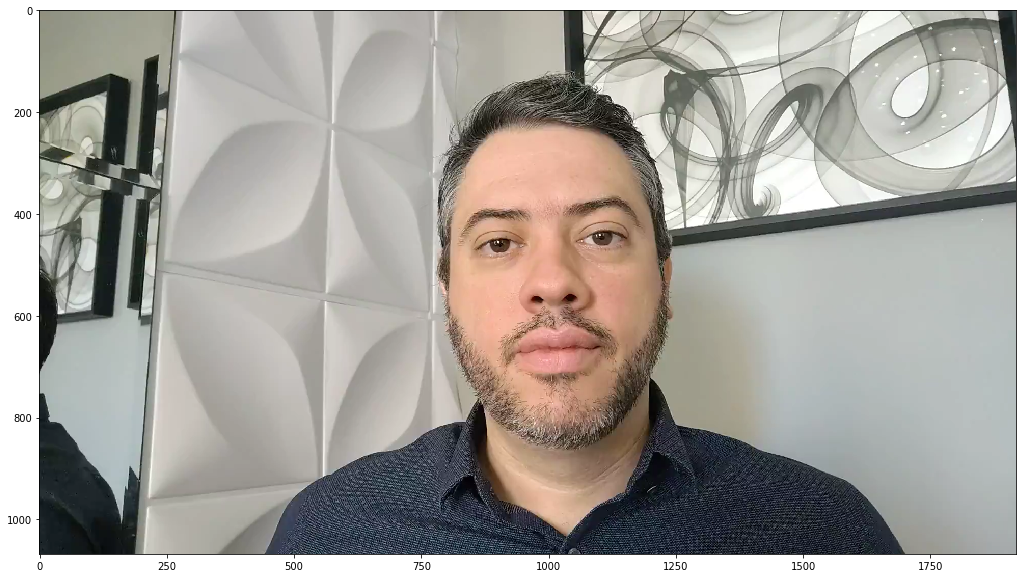

In [5]:
img = cv2.cvtColor(cv2.imread("marcus.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

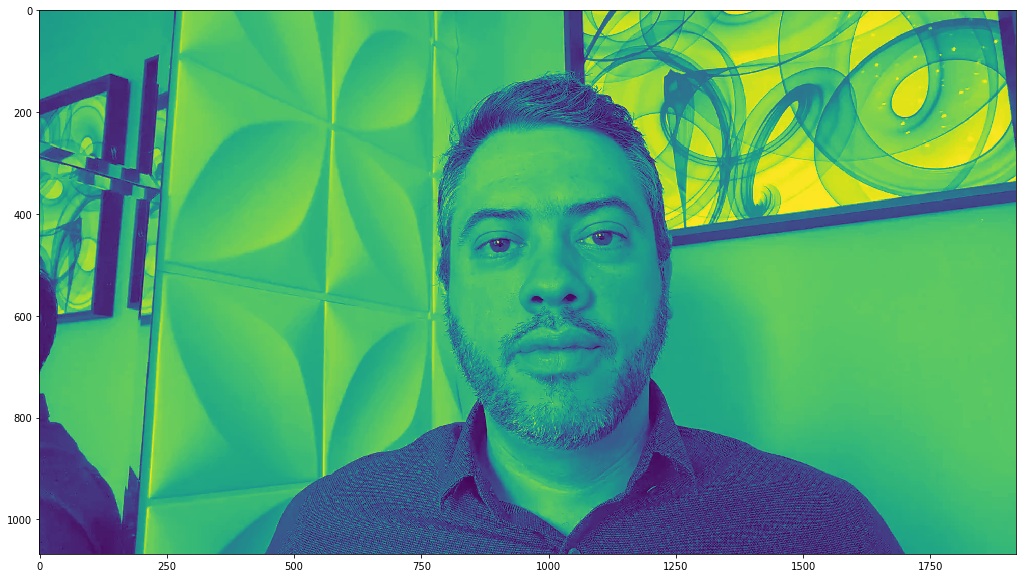

In [6]:
#convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(gray)

In [7]:
#detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [8]:
#for each face
for (x,y,w,h) in faces:
    #draw rectangle around face
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #select face as region of interest 
    roi_gray = gray[y:y+h,x:x+h]
    roi_color = img[y:y+h,x:x+h]
    #within region of interest find eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #for each eye
    for (ex,ey,ew,eh) in eyes:
        #draw retangle around eye
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)

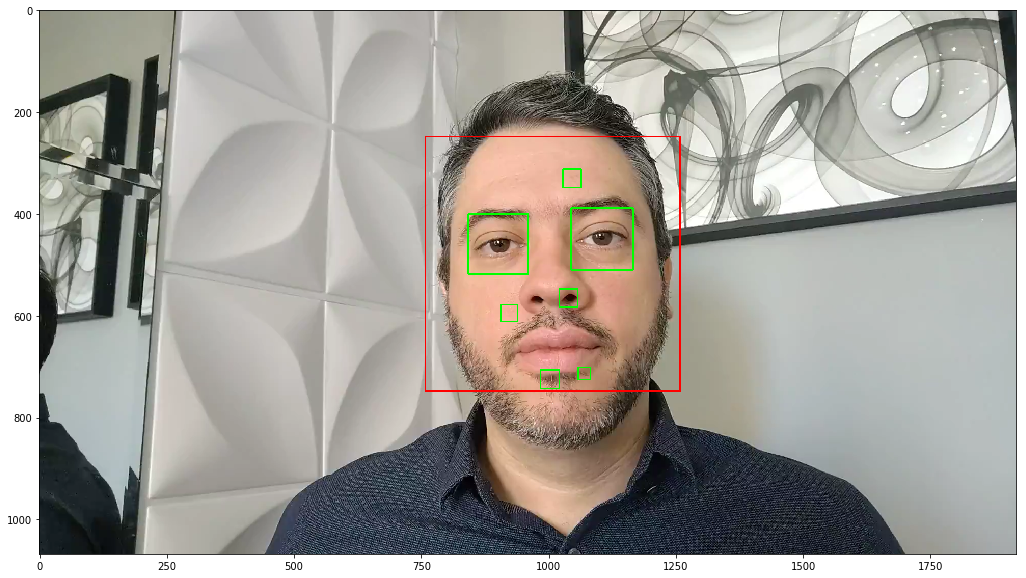

In [9]:
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

In [10]:
# cv2.imshow('img',img) #shows image
# cv2.waitKey(0) #waits until a key is pressed to progress
# cv2.destroyAllWindows() #closes windows

In [11]:
#read images
img = cv2.imread('marcus.png')
witch = cv2.imread('witch.png')

In [12]:
#get shape of witch
original_witch_h,original_witch_w,witch_channels = witch.shape

In [13]:
#get shape of img
img_h,img_w,img_channels = img.shape

In [14]:
#convert to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
witch_gray = cv2.cvtColor(witch, cv2.COLOR_BGR2GRAY)

In [15]:
#create mask and inverse mask of witch
#Note: I used THRESH_BINARY_INV because my image was already on 
#transparent background, try cv2.THRESH_BINARY if you are using a white background
ret, original_mask = cv2.threshold(witch_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#find faces in image using classifier
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

In [16]:
for (x,y,w,h) in faces:
    #retangle for testing purposes
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    #coordinates of face region
    face_w = w
    face_h = h
    face_x1 = x
    face_x2 = face_x1 + face_w
    face_y1 = y
    face_y2 = face_y1 + face_h

    #witch size in relation to face by scaling
    witch_width = int(1.5 * face_w)
    witch_height = int(witch_width * original_witch_h / original_witch_w)
    
    #setting location of coordinates of witch
    witch_x1 = face_x2 - int(face_w/2) - int(witch_width/2)
    witch_x2 = witch_x1 + witch_width
    witch_y1 = face_y1 - int(face_h*1.25)
    witch_y2 = witch_y1 + witch_height 

    #check to see if out of frame
    if witch_x1 < 0:
        witch_x1 = 0
    if witch_y1 < 0:
        witch_y1 = 0
    if witch_x2 > img_w:
        witch_x2 = img_w
    if witch_y2 > img_h:
        witch_y2 = img_h

    #Account for any out of frame changes
    witch_width = witch_x2 - witch_x1
    witch_height = witch_y2 - witch_y1

    #resize witch to fit on face
    witch = cv2.resize(witch, (witch_width,witch_height), interpolation = cv2.INTER_AREA)
    mask = cv2.resize(original_mask, (witch_width,witch_height), interpolation = cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv, (witch_width,witch_height), interpolation = cv2.INTER_AREA)

    #take ROI for witch from background that is equal to size of witch image
    roi = img[witch_y1:witch_y2, witch_x1:witch_x2]

    #original image in background (bg) where witch is not present
    roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
    roi_fg = cv2.bitwise_and(witch,witch,mask=mask_inv)
    dst = cv2.add(roi_bg,roi_fg)

    #put back in original image
    img[witch_y1:witch_y2, witch_x1:witch_x2] = dst

In [17]:
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

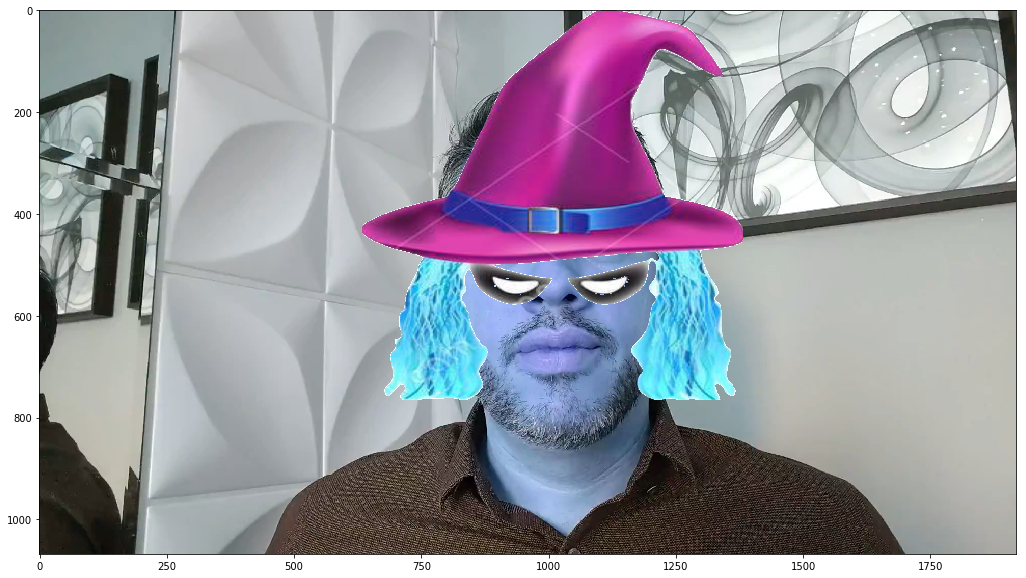

In [18]:
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

### Colocando o Chapeu na Camera

In [ ]:
#read images
witch = cv2.imread('witch.png')

#get shape of witch
original_witch_h,original_witch_w,witch_channels = witch.shape

#get shape of img
#img_h,img_w,img_channels = img.shape

#convert to gray
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
witch_gray = cv2.cvtColor(witch, cv2.COLOR_BGR2GRAY)

#create mask and inverse mask of witch
ret, original_mask = cv2.threshold(witch_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#read video
cap = cv2.VideoCapture(0)
ret, img = cap.read()
img_h, img_w = img.shape[:2]

while True:   #continue to run until user breaks loop
    
    #read each frame of video and convert to gray
    ret, img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #find faces in image using classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    #for every face found:
    for (x,y,w,h) in faces:
        #retangle for testing purposes
        #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        #coordinates of face region
        face_w = w
        face_h = h
        face_x1 = x
        face_x2 = face_x1 + face_w
        face_y1 = y
        face_y2 = face_y1 + face_h

        #witch size in relation to face by scaling
        witch_width = int(1.5 * face_w)
        witch_height = int(witch_width * original_witch_h / original_witch_w)
        
        #setting location of coordinates of witch
        witch_x1 = face_x2 - int(face_w/2) - int(witch_width/2)
        witch_x2 = witch_x1 + witch_width
        witch_y1 = face_y1 - int(face_h*1.25)
        witch_y2 = witch_y1 + witch_height 

        #check to see if out of frame
        if witch_x1 < 0:
            witch_x1 = 0
        if witch_y1 < 0:
            witch_y1 = 0
        if witch_x2 > img_w:
            witch_x2 = img_w
        if witch_y2 > img_h:
            witch_y2 = img_h

        #Account for any out of frame changes
        witch_width = witch_x2 - witch_x1
        witch_height = witch_y2 - witch_y1

        #resize witch to fit on face
        witch = cv2.resize(witch, (witch_width,witch_height), interpolation = cv2.INTER_AREA)
        mask = cv2.resize(original_mask, (witch_width,witch_height), interpolation = cv2.INTER_AREA)
        mask_inv = cv2.resize(original_mask_inv, (witch_width,witch_height), interpolation = cv2.INTER_AREA)

        #take ROI for witch from background that is equal to size of witch image
        roi = img[witch_y1:witch_y2, witch_x1:witch_x2]

        #original image in background (bg) where witch is not
        roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
        roi_fg = cv2.bitwise_and(witch,witch,mask=mask_inv)
        dst = cv2.add(roi_bg,roi_fg)

        #put back in original image
        img[witch_y1:witch_y2, witch_x1:witch_x2] = dst


        break
    #display image
    cv2.imshow('img',img) 

    #if user pressed 'q' break
    if cv2.waitKey(1) == ord('q'): # 
        break;

cap.release() #turn off camera 
cv2.destroyAllWindows() #close all windows

In [ ]:
cap.release() #turn off camera 
cv2.destroyAllWindows() #close all windows